In [1]:
import pandas as pd
import numpy as np
import mlxtend as mlx
import mlxtend.preprocessing as mlp
import mlxtend.frequent_patterns as FP
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

## Analisis de todos los delitos, dividiendo el dia en diferentes partes

Cargar los datos

In [4]:
#data = pd.read_csv('/content/drive/MyDrive/csv/carpetas-de-investigacion-pgj-cdmx.csv',na_values='NaN')
data = pd.read_csv('/content/drive/MyDrive/csv/carpetas-de-investigacion-pgj-cdmx.csv',na_values='NaN')
data = data.drop(columns=['año_hechos','mes_hechos','categoria_delito',
                        'Geopoint','calle_hechos2','calle_hechos',
                        'colonia_hechos','mes_inicio','ao_inicio','fiscalía','agencia',
                        'unidad_investigacion',])
data.fecha_hechos = pd.to_datetime(data.fecha_hechos)
data.fecha_inicio = pd.to_datetime(data.fecha_inicio)
data.rename(columns={'longitud':'lon','latitud':'lat'}, inplace=True)

#creamos clases de apoyo para facilitar el proyecto

In [5]:
class experimentoDiaNoche():
    def __init__(self,ex1):
        delitos = ex1.delito
        alcaldia = ex1.alcaldia_hechos
        hora_hechos = [ex1.fecha_hechos[i].hour for i in range(ex1.shape[0])]
        print('Hora hechos')
        hora_arr1 = []
        for hora in hora_hechos:
            if hora in range(0,12):
                hora_arr1.append('dia')
            else:
                hora_arr1.append('noche')
        tiempo_denuncia = ex1.fecha_inicio - ex1.fecha_hechos 
        tiempo_denuncia_arr1 = []
        for diffe in tiempo_denuncia:
            dias = diffe.days
            if dias <= 1:
                tiempo_denuncia_arr1.append('dia')
            elif dias <= 7:
                tiempo_denuncia_arr1.append('sem')
            elif dias <= 30:
                tiempo_denuncia_arr1.append('mes')
            else:
                tiempo_denuncia_arr1.append('inf')
        print('Tiempo denuncia')
        experimento1 = pd.DataFrame(
                                        {'delitos': delitos,
                                        'alcaldia': alcaldia,
                                        'hora': hora_arr1,
                                        'tden':tiempo_denuncia_arr1
                                        })
        self.experimento1 = pd.get_dummies(experimento1, 
                        columns=experimento1.columns,
                        dtype = bool) 
        print('Dummies') 
        
    
    def patrones_umbral(self,u):
         perfilesFrec = FP.apriori(self.experimento1, min_support=u,use_colnames=True)
         return perfilesFrec

    def grafica_umbrales(self,l=5,u=100):
        X = [x/100 for x in range(l,u+1)]
        Y = []

        for x in X:
            perfilesFrec = FP.apriori(self.experimento1, min_support=x)#,use_colnames=True)
            Y.append(perfilesFrec.shape[0])

        plt.plot(X,Y)
        plt.title('Experimento día/noche')
        plt.xlabel('umbral')
        plt.ylabel('patrones')
        plt.show()

In [ ]:
class experimentoDiaTardeNoche():
    def __init__(self,ex1):
        delitos = ex1.delito
        alcaldia = ex1.alcaldia_hechos
        hora_hechos = [ex1.fecha_hechos[i].hour for i in range(ex1.shape[0])]
        print('Hora hechos')
        hora_arr1 = []
        for hora in hora_hechos:
            if hora in range(0,8):
                hora_arr1.append('dia')
            elif hora in range(8,16):
                hora_arr1.append('tarde')
            else:
                hora_arr1.append('noche')
        tiempo_denuncia = ex1.fecha_inicio - ex1.fecha_hechos 
        tiempo_denuncia_arr1 = []
        for diffe in tiempo_denuncia:
            dias = diffe.days
            if dias <= 1:
                tiempo_denuncia_arr1.append('dia')
            elif dias <= 7:
                tiempo_denuncia_arr1.append('sem')
            elif dias <= 30:
                tiempo_denuncia_arr1.append('mes')
            else:
                tiempo_denuncia_arr1.append('inf')
        print('Tiempo denuncia')
        experimento1 = pd.DataFrame(
                                        {'delitos': delitos,
                                        'alcaldia': alcaldia,
                                        'hora': hora_arr1,
                                        'tden':tiempo_denuncia_arr1
                                        })
        self.experimento1 = pd.get_dummies(experimento1, 
                        columns=experimento1.columns,
                        dtype = bool) 
        print('Dummies') 
        
    
    def patrones_umbral(self,u):
         perfilesFrec = FP.apriori(self.experimento1, min_support=u,use_colnames=True)
         return perfilesFrec

    def grafica_umbrales(self,l=5,u=100):
        X = [x/100 for x in range(l,u+1)]
        Y = []

        for x in X:
            perfilesFrec = FP.apriori(self.experimento1, min_support=x)#,use_colnames=True)
            Y.append(perfilesFrec.shape[0])

        plt.plot(X,Y)
        plt.title('Experimento día/tarde/noche')
        plt.xlabel('umbral')
        plt.ylabel('patrones')
        plt.show()

Cargar datos para los experimentos

In [ ]:
ex1 = experimentoDiaNoche(data)

Hora hechos
Tiempo denuncia
Dummies


In [ ]:
ex1_1=experimentoDiaTardeNoche(data)

Hora hechos
Tiempo denuncia
Dummies


Hacemos las graficas de umbral-patrones encontrados para los dos experimentos, esto con el fin de ayudarnos a escoger el umbral correcto

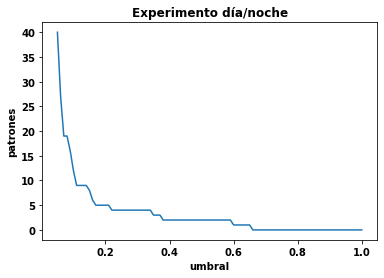

In [ ]:
ex1.grafica_umbrales()

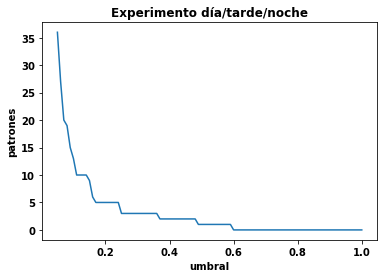

In [ ]:
ex1_1.grafica_umbrales()

Obtener los patrones frecuentes

In [ ]:
patrones = ex1.patrones_umbral(0.06)
patrones['casos'] = patrones['support']*800000
patrones['support'] = patrones['support']*100
print(patrones)

      support                                 itemsets          casos
0    6.357750   (delitos_ROBO A NEGOCIO SIN VIOLENCIA)   50862.003954
1    6.455170                (delitos_ROBO DE OBJETOS)   51641.361849
2    8.594325             (delitos_VIOLENCIA FAMILIAR)   68754.597457
3    6.498935                (alcaldia_ALVARO OBREGON)   51991.479482
4    8.728091                 (alcaldia_BENITO JUAREZ)   69824.731014
5    6.705025                      (alcaldia_COYOACAN)   53640.197263
6   16.244494                    (alcaldia_CUAUHTEMOC)  129955.950949
7    9.902321              (alcaldia_GUSTAVO A MADERO)   79218.565136
8   14.826344                    (alcaldia_IZTAPALAPA)  118610.754991
9    6.637400                (alcaldia_MIGUEL HIDALGO)   53099.196287
10  34.976653                               (hora_dia)  279813.221144
11  65.023347                             (hora_noche)  520186.778856
12  59.020289                               (tden_dia)  472162.310183
13  15.738233       

In [ ]:
patrones1 = ex1_1.patrones_umbral(0.06)
patrones1['casos'] = patrones1['support']*800000
patrones1['support'] = patrones1['support']*100
print(patrones1)

      support                                itemsets          casos
0    6.357750  (delitos_ROBO A NEGOCIO SIN VIOLENCIA)   50862.003954
1    6.455170               (delitos_ROBO DE OBJETOS)   51641.361849
2    8.594325            (delitos_VIOLENCIA FAMILIAR)   68754.597457
3    6.498935               (alcaldia_ALVARO OBREGON)   51991.479482
4    8.728091                (alcaldia_BENITO JUAREZ)   69824.731014
5    6.705025                     (alcaldia_COYOACAN)   53640.197263
6   16.244494                   (alcaldia_CUAUHTEMOC)  129955.950949
7    9.902321             (alcaldia_GUSTAVO A MADERO)   79218.565136
8   14.826344                   (alcaldia_IZTAPALAPA)  118610.754991
9    6.637400               (alcaldia_MIGUEL HIDALGO)   53099.196287
10  15.250269                              (hora_dia)  122002.148674
11  36.436960                            (hora_noche)  291495.677308
12  48.312772                            (hora_tarde)  386502.174018
13  59.020289                     

Obtenemos las reglas de asosiacion

In [ ]:
reglas=association_rules(ex1.patrones_umbral(.06), metric="confidence", min_threshold=0.5)
reglas = reglas.drop(columns=['antecedent support','consequent support','support','lift','leverage','conviction'])
reglas['confidence'] = reglas['confidence']*100
reglas

,antecedents,consequents,confidence
0,(alcaldia_CUAUHTEMOC),(hora_noche),66.075329
1,(alcaldia_CUAUHTEMOC),(tden_dia),54.735648
2,(alcaldia_GUSTAVO A MADERO),(hora_noche),64.710289
3,(alcaldia_GUSTAVO A MADERO),(tden_dia),62.996117
4,(alcaldia_IZTAPALAPA),(hora_noche),63.931091
5,(alcaldia_IZTAPALAPA),(tden_dia),62.453513
6,(hora_dia),(tden_dia),60.821233
7,(hora_noche),(tden_dia),58.051544
8,(tden_dia),(hora_noche),63.956070
9,(tden_inf),(hora_noche),68.215739


In [ ]:
reglas1=association_rules(ex1_1.patrones_umbral(.06), metric="confidence", min_threshold=0.5)
reglas1 = reglas1.drop(columns=['antecedent support','consequent support','support','lift','leverage','conviction'])
reglas1['confidence'] = reglas1['confidence']*100
reglas1

,antecedents,consequents,confidence
0,(alcaldia_CUAUHTEMOC),(hora_tarde),54.301849
1,(alcaldia_CUAUHTEMOC),(tden_dia),54.735648
2,(alcaldia_GUSTAVO A MADERO),(tden_dia),62.996117
3,(alcaldia_IZTAPALAPA),(tden_dia),62.453513
4,(hora_dia),(tden_dia),67.967249
5,(hora_noche),(tden_dia),66.258381
6,(hora_tarde),(tden_dia),50.737228
7,(tden_inf),(hora_tarde),69.119888


##Analisis a solo un delito

creamos el dataset y vemos cuantos registros tiene

In [6]:
fraudeData=data[data['delito'] == 'FRAUDE']
fraudeData.index=[i for i in range(len(fraudeData['delito']))]
print(len(fraudeData.index))

45349


Hacemos una grafica de umbrales

In [7]:
fraudes=experimentoDiaNoche(fraudeData)

Hora hechos
Tiempo denuncia
Dummies


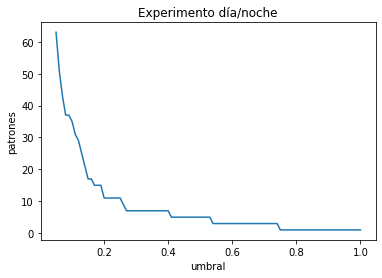

In [8]:
fraudes.grafica_umbrales()

sacamos los patrones

In [ ]:
fraudes.patrones_umbral(0.30)

Hora hechos
Tiempo denuncia
Dummies


,support,itemsets
0,1.000000,(delitos_FRAUDE)
1,0.742729,(hora_noche)
2,0.539020,(tden_inf)
3,0.742729,"(hora_noche, delitos_FRAUDE)"
4,0.539020,"(tden_inf, delitos_FRAUDE)"
5,0.402170,"(hora_noche, tden_inf)"
6,0.402170,"(hora_noche, tden_inf, delitos_FRAUDE)"


obtenemos las reglas de asosiacion

In [ ]:
reglas_fraude = association_rules(fraudes.patrones_umbral(.3), metric="confidence", min_threshold=0.5)
reglas_fraude = reglas_fraude.drop(columns=['antecedent support','consequent support','support','lift','leverage','conviction'])
reglas_fraude['confidence'] = reglas_fraude['confidence']*100
reglas_fraude

,antecedents,consequents,confidence
0,(hora_noche),(delitos_FRAUDE),100.000000
1,(delitos_FRAUDE),(hora_noche),74.272862
2,(tden_inf),(delitos_FRAUDE),100.000000
3,(delitos_FRAUDE),(tden_inf),53.901960
4,(hora_noche),(tden_inf),54.147616
5,(tden_inf),(hora_noche),74.611357
6,"(hora_noche, tden_inf)",(delitos_FRAUDE),100.000000
7,"(hora_noche, delitos_FRAUDE)",(tden_inf),54.147616
8,"(tden_inf, delitos_FRAUDE)",(hora_noche),74.611357
9,(hora_noche),"(tden_inf, delitos_FRAUDE)",54.147616
